# Predicting house prices
### Author: Adriana Bukala

Today we will face a regression problem - predicting house prices for King County (US). Let's start with loading some basic packages for plotting and keeping our data.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Data loading

Our dataset consists of 21613 houses (a.k.a. observations, dataset rows) sold between May 2014 and May 2015. Each house has 19 following features (a.k.a. variables, dataset columns):

* Id: Unique ID for each home sold
* Date: Date of the home sale
* Price: Price of each home sold
* Bedrooms: Number of bedrooms
* Bathrooms: Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* Sqft_living: Square footage of the apartments interior living space
* Sqft_lot: Square footage of the land space
* Floors: Number of floors
* Waterfront: A dummy variable for whether the apartment was overlooking the waterfront or not
* View: An index from 0 to 4 of how good the view of the property was
* Condition: An index from 1 to 5 on the condition of the apartment
* Grade: An index from 1 to 13, where 1-3 falls short of the building construction and design, 7 has an average level of  construction and design, and 11-13 have a high quality level of construction and design
* Sqft_above: The square footage of the interior housing space that is above ground level.
* Sqft_basement: The square footage of the interior housing space that is below ground level.
* Yr_built: The year the house was initially built
* Yr_renovated: The year of the house's last renovation
* Zipcode: What zipcode area the house is in
* Lat: Lattitude
* Long: Longitude
* Sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors.
* Sqft_lot15: The square footage of the land lots of the nearest 15 neighbors.

In [2]:
dataframe = pd.read_csv('house_data.csv')

### Expalanatory data analysis

In [4]:
dataframe.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We can see a lot of variety in our data: we have a quite high standard deviation of house price (3.671272e+05); maximal sqft_living (square footage of the apartments interior living space) is almost **5** times larger than the minimal one. 

Generally speaking, sold houses were rather in a good condition (mean 3.41/5) and of average design (mean grade 7.66/13). On the other hand, they rarely had a nice view (mean 0.23/4), which I pressume would lower their price, but not drastically as it seems typical for houses in this area.

Now, let's take a look at our variable of interest - **house price**.

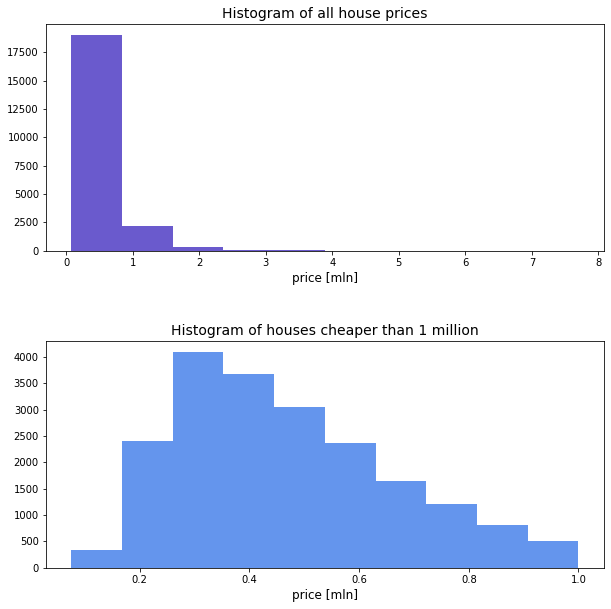

In [6]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

axs[0].hist(dataframe['price'] / 10**6, color='slateblue')
axs[0].set_title('Histogram of all house prices', fontsize=14)
axs[0].set_xlabel('price [mln]', fontsize=12)

axs[1].hist(np.array([p for p in dataframe['price'] if p < 10**6]) / 10**6, color='cornflowerblue')
axs[1].set_title('Histogram of houses cheaper than 1 million', fontsize=14)
axs[1].set_xlabel('price [mln]', fontsize=12)

plt.subplots_adjust(hspace=0.4)
plt.show()

We can't say that much just based on the first plot. It is clearly visible that most of our houses were cheaper than 1 milion, and we have some expensive outliers, but we can see real variability only on the second plot. Here, we see right-skewed distrubution of "cheap" house prices.

Moving on, let's investigate relationships between our variables. We will compute correlation using Kendall Tau method, which can handle non-linear relationships (but it's not perfect, obviously).

In [19]:
dataframe.corr(method='kendall')['price'].sort_values(ascending=False)

price            1.000000
grade            0.527834
sqft_living      0.463611
sqft_living15    0.405032
sqft_above       0.378237
bathrooms        0.369208
lat              0.292897
bedrooms         0.265094
floors           0.251624
view             0.237573
sqft_basement    0.190396
waterfront       0.094069
yr_renovated     0.082378
yr_built         0.070320
sqft_lot         0.047192
long             0.039867
sqft_lot15       0.038426
condition        0.014481
id               0.003220
zipcode         -0.009827
Name: price, dtype: float64

There's no variable highly correlated with price, unfortunately, because it would make this whole task a lot easier. Good news is that we have a few promisingly correlated variables.

It's worth noticing that there's almost no correlation between price and footage of the land space. I guess there's a simple reason behind it - probably most of houses were located near city center and didn't have space for a garden etc.

Moreover, condition seems less important that I would have thought. Based on mean and standard devation values, I'd say it's because, on average, house condition is satisfying.

### Data preprocessing

Now, we will prepare our data for prediction. First of all, we will get rid of following columns:
* id (because it's just an identifier, which tells us nothing),
* date (because all apartaments were sold in a short time period, so it shouldn't matter),
* zipcode (because it's redundant with lattitude and longitude).

From our correlation analysis, it seemed like we could remove more variables, but let's stick with them for now.

In [20]:
dataframe = dataframe.drop(['id', 'date', 'zipcode'], axis=1)

We need to split our data into dependent variable **y** and independent variables **X**.

In [21]:
X = dataframe.loc[:, dataframe.columns != 'price']
y = np.array(dataframe.loc[:, 'price'].tolist())

In [22]:
X.shape, y.shape

((21613, 17), (21613,))

Moreover, in order to validate our model, we need to split data into training and testing datasets.

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

### First prediction - gradient boosting

We will try using a xgboost model with learning rate 0.1, 100 independent trees of maximum depth of 15.

In [24]:
from xgboost import XGBRegressor

In [25]:
model = XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=15)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

mse = mean_squared_error(y_test, y_pred)

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Root mean squared error:', np.sqrt(mse), '\n')
print('Explained variance:', explained_variance_score(y_test, y_pred))
print('R**2 score:', r2_score(y_test, y_pred))

Mean absolute error: 66874.7775618349
Root mean squared error: 124001.26054443783 

Explained variance: 0.8859324694767368
R**2 score: 0.8857868369647077


RMSE could seem quite scary, but let's remember, how high standard deviation of house prices was, and focus on explained variance instead. Based on this score, we say that our model is good enough in predicting house prices.

#### Model1 decomposition using SHAP

Now, we will try to explain some of our model predictions using shap package.

In [27]:
import shap
shap.initjs()

We train an explainer of our tree model.

In [32]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(X)

And check global tendencies in our predictions.

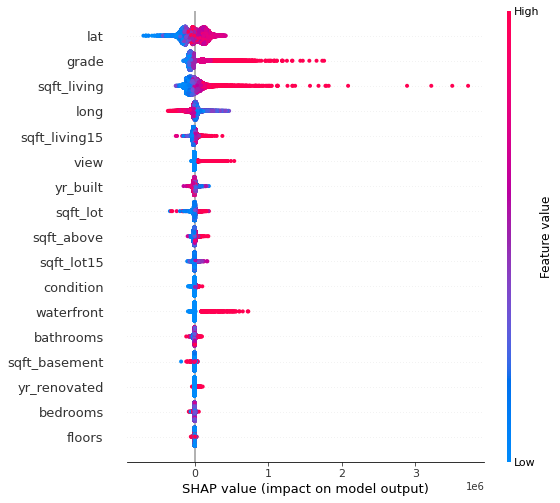

In [33]:
shap.summary_plot(shap_values, X)

One eye-catching thing is **sqft_living** impact with a few visible outliers - higher living space, higher house price. As we noticed earlier, **grade** has larger impact than **condition**. Moreover, **waterfront** and **view** (probably correlated) are highly attractive.

One more interesting thing is that **lattitude** tends to change price more than **longitude**. I believe that it's caused by the fact that Seattle is "longer" than "wider", so probably longitude changes do not wider distance from the city center as much.

Now, we randomly choose 3 observations from whole dataset.

In [45]:
observations_ids = np.random.choice(range(len(dataframe)), 3)
dataframe.iloc[observations_ids, :]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
8882,280000.0,3,2.25,1860,9210,2.0,0,0,3,7,1860,0,1994,0,47.3864,-122.030,1530,8091
18614,405000.0,3,2.25,1520,1245,3.0,0,0,3,8,1520,0,2004,0,47.6907,-122.340,1520,1470
19889,395000.0,3,2.50,2130,5088,2.0,0,0,3,8,1840,290,2011,0,47.7329,-121.976,2130,5762


We analyze predictions for chosen variables.

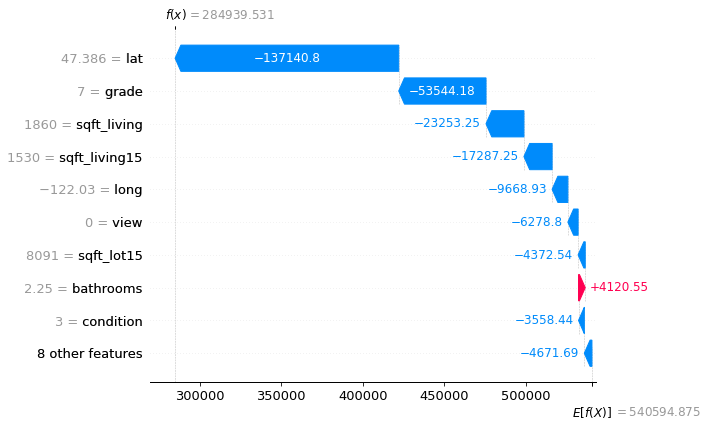

True price: 280000.0


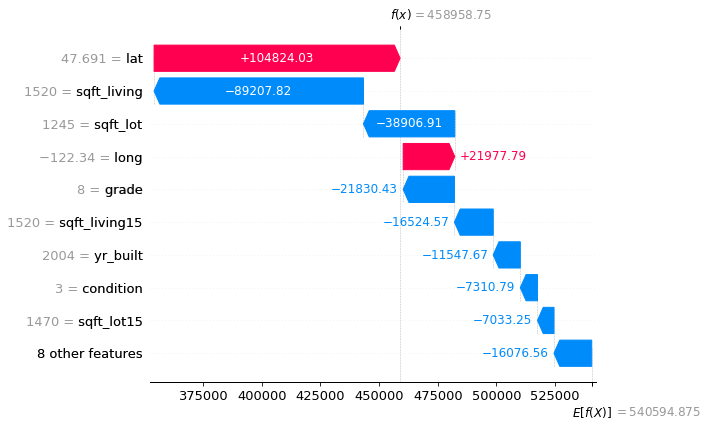

True price: 405000.0


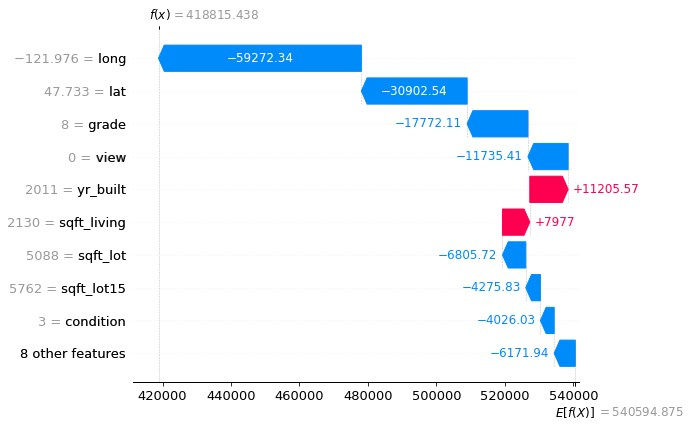

True price: 395000.0


In [46]:
for idx in observations_ids:
    shap.plots.waterfall(shap_values[idx])
    print(f'True price: {dataframe.iloc[idx]["price"]}')

Comments on results:
1. This house is rather small, probably far from city center, with average design, condition and uninteresting view. What it's interesting about it though, is the fact that it's larger than houses in the neighbourhood, but it's still lowering its price. For me, it seems like neighbourhood it's not attractive, so the price is low, because there are no real "competitors" nearby.
2. Another small house, but in much better location, which increases its price. **It's worth noticing that latitude has different effect on prices of first and second house - in first case it decreases the price, hear it increases it (probably because it indicates being close to the city center**.
3. It's rather new house, larger than the previous two, but its pros seem to vanish in comparison to disadvantageous location. **As for previous apartaments, living area was second highest impact variable, here it doesn't matter that much, because for that location (probably suburbs) expectations about living space are much higher.**

### Second prediction - gradient boosting

We will create a xgboost model once again, but this time we will choose only variables, which seemed to correlate with house price, subjectively picking variables of correlation > 0.2.

In [50]:
variables = [
    'grade',
    'sqft_living',
    'sqft_living15',
    'sqft_above',
    'bathrooms',
    'lat',
    'bedrooms',
    'floors',
    'view'
]

X2_train = X_train.loc[:, variables]
X2_test = X_test.loc[:, variables]

Now we will train exactly same model as previously.

In [51]:
model2 = XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=15)
model2.fit(X2_train, y_train)
y2_pred = model2.predict(X2_test)

In [52]:
mse = mean_squared_error(y_test, y_pred)

print('Mean absolute error:', mean_absolute_error(y_test, y2_pred))
print('Root mean squared error:', np.sqrt(mse), '\n')
print('Explained variance:', explained_variance_score(y_test, y2_pred))
print('R**2 score:', r2_score(y_test, y2_pred))

Mean absolute error: 88147.46296291833
Root mean squared error: 124001.26054443783 

Explained variance: 0.7915619731099754
R**2 score: 0.7912414408354651


Even though removed variables didn't seem to correlate with house prices, they did help our first model with prediction.

#### Model2 decomposition using SHAP

In [53]:
explainer2 = shap.TreeExplainer(model2)
shap_values2 = explainer2(X.loc[:, variables])

Let's check global tendencies with comparison to model1.

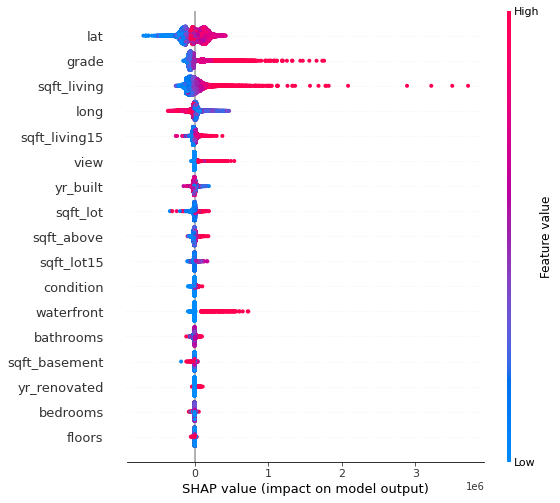

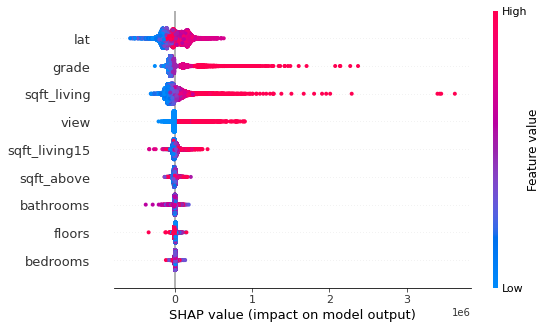

In [56]:
shap.summary_plot(shap_values, X)
shap.summary_plot(shap_values2, X.loc[:, variables])

Once again, **grade**, **sqft_living** and **view** have a large impact on price, but in the second model view has larger impact than in first one. Moreover, in the second model latitude could decrease and increase price with approximately same probability.

Now, let's check our previously chosen observations and look for some differences.

In [57]:
observations_ids

array([ 8882, 18614, 19889])

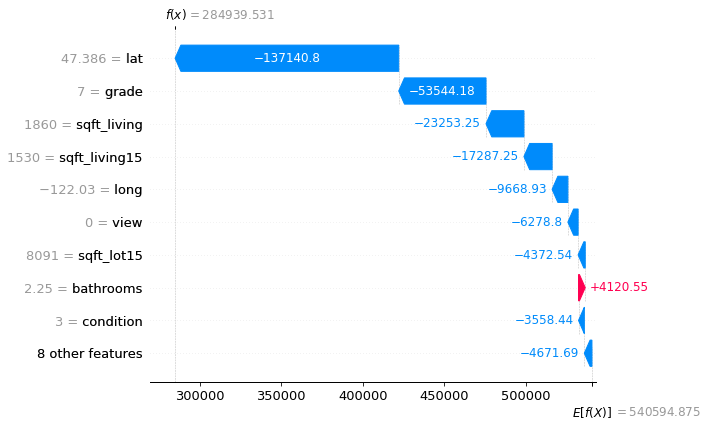

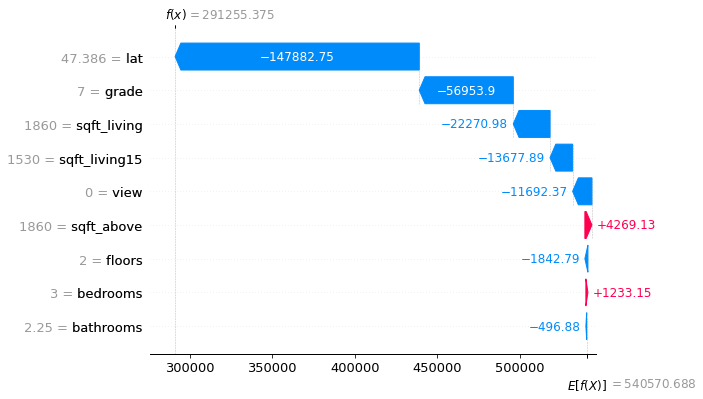

True price: 280000.0


In [59]:
shap.plots.waterfall(shap_values[8882])
shap.plots.waterfall(shap_values2[8882])
print(f'True price: {dataframe.iloc[8882]["price"]}')

Model1 was better at predicting real price. These two plots look quite similar.

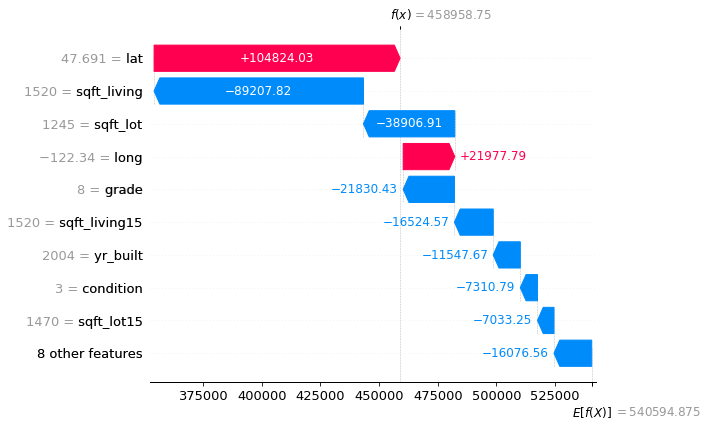

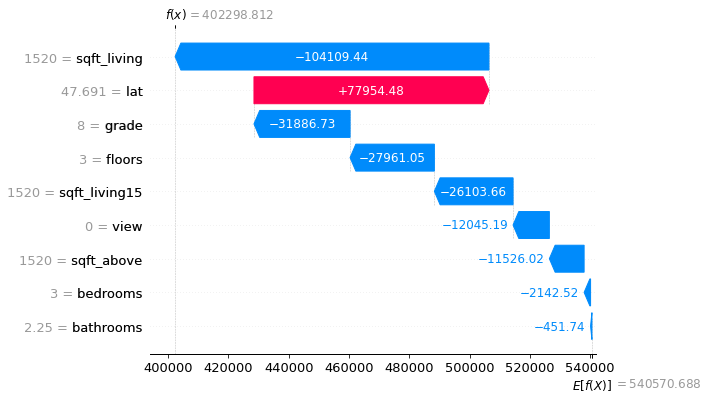

True price: 405000.0


In [60]:
shap.plots.waterfall(shap_values[18614])
shap.plots.waterfall(shap_values2[18614])
print(f'True price: {dataframe.iloc[18614]["price"]}')

In this case, **model2 was better at predicting house price. Difference lies in first two variables of highest impact - in first case, latitude is more important than living space, so together they are increasing the price. In the second case, order is different, so these two variables are decreasing the price.** Moreover, an average grade or a poor view are not that important, when we know about precise location of this house.

Colloquially speaking, model1 focused on apartament's pros, and model2 - on cons, and it seems like, in this case, potential buyers were more pesimistic (as model2).